In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("./training.1600000.processed.noemoticon.csv",header=None, names=cols)
df.drop(['id', 'date', 'query_string', 'user'], axis=1, inplace=True)

In [3]:
df['pre_clean_len'] = [len(t) for t in df.text]
print("Average tweet length pre-cleaning:", np.average(df['pre_clean_len']), "characters.")

Average tweet length pre-cleaning: 74.041768125 characters.


In [76]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re

STOPWORDS = stopwords.words('english')

def text_cleaner(text, remove_stopwords=True):
    temp = BeautifulSoup(text, 'lxml').get_text() # removes html encoding
    temp.replace("'", "") # avoids removing contractions
    temp = temp.lower() # lowercase
    temp = re.sub(r'@[A-Za-z0-9_]+', '', temp) # removes mentions
    temp = re.sub(r'https?://\S+', '', temp) # removes urls (http/https)
    temp = re.sub(r'www.\S+', '', temp) # removes urls (www.)
    temp = re.sub(r'[&,.]', ' ', temp) # removes all non letters
    temp = re.sub(r'[^a-z\s]+', '', temp)
    # tokenizes and removes stopwords
    temp = temp.split()
    if remove_stopwords: temp = [w for w in temp if w not in STOPWORDS]
    cleaned = " ".join(word for word in temp)
    cleaned = cleaned.strip()
    return cleaned

clean_tweets = []
clean_tweets_no_stopwords = []

# for i in range(len(df)):
#     if ((i+1)%10000 == 0): print("%d tweets have been cleaned" % (i+1))
    
#     clean_tweet = text_cleaner(df.text[i], remove_stopwords=False)
#     clean_tweet_no_stopwords = text_cleaner(df.text[i])
    
#     clean_tweets.append(clean_tweet)
#     clean_tweets_no_stopwords.append(clean_tweet_no_stopwords)

In [21]:
# creating new DataFrames and dropping null entries (which have occurred due to cleaning) to get cleaned training set
clean_df = pd.DataFrame(clean_tweets, columns=['clean_text'])
clean_no_stopwords_df = pd.DataFrame(clean_tweets_no_stopwords, columns=['clean_text'])

clean_df['target'] = df.sentiment
clean_no_stopwords_df['target'] = df.sentiment

clean_df = clean_df[clean_df['clean_text'] != '']
clean_no_stopwords_df = clean_no_stopwords_df[clean_no_stopwords_df['clean_text'] != '']

clean_df.reset_index(drop=True, inplace=True)
clean_no_stopwords_df.reset_index(drop=True, inplace=True)

clean_df.info()
clean_no_stopwords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596243 entries, 0 to 1596242
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   clean_text  1596243 non-null  object
 1   target      1596243 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592108 entries, 0 to 1592107
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   clean_text  1592108 non-null  object
 1   target      1592108 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.3+ MB


In [22]:
clean_df.to_csv('clean_tweets_with_stopwords.csv', encoding='utf-8')
clean_no_stopwords_df.to_csv('clean_tweets.csv', encoding='utf-8')

Validation result for 10000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 79.17%
model is 28.58 % more accurate than null accuracy
train and test time: 74.97s
--------------------------------------------------------------------------------
Validation result for 20000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 79.56%
model is 28.97 % more accurate than null accuracy
train and test time: 92.31s
--------------------------------------------------------------------------------
Validation result for 30000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 79.78%
model is 29.19 % more accurate than null accuracy
train and test time: 83.53s
--------------------------------------------------------------------------------
Validation result for 40000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 79.91%
model is 29.31 % more accurate than null accuracy
train and test time: 81.94s
--------------------------------------------------------------------------------
Validation result for 50000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.13%
model is 29.53 % more accurate than null accuracy
train and test time: 83.61s
--------------------------------------------------------------------------------
Validation result for 60000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.06%
model is 29.46 % more accurate than null accuracy
train and test time: 81.35s
--------------------------------------------------------------------------------
Validation result for 70000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.28%
model is 29.69 % more accurate than null accuracy
train and test time: 77.25s
--------------------------------------------------------------------------------
Validation result for 80000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.05%
model is 29.46 % more accurate than null accuracy
train and test time: 76.97s
--------------------------------------------------------------------------------
Validation result for 90000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.21%
model is 29.61 % more accurate than null accuracy
train and test time: 78.89s
--------------------------------------------------------------------------------
Validation result for 100000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.59%
accuracy score: 80.25%
model is 29.65 % more accurate than null accuracy
train and test time: 80.28s
--------------------------------------------------------------------------------


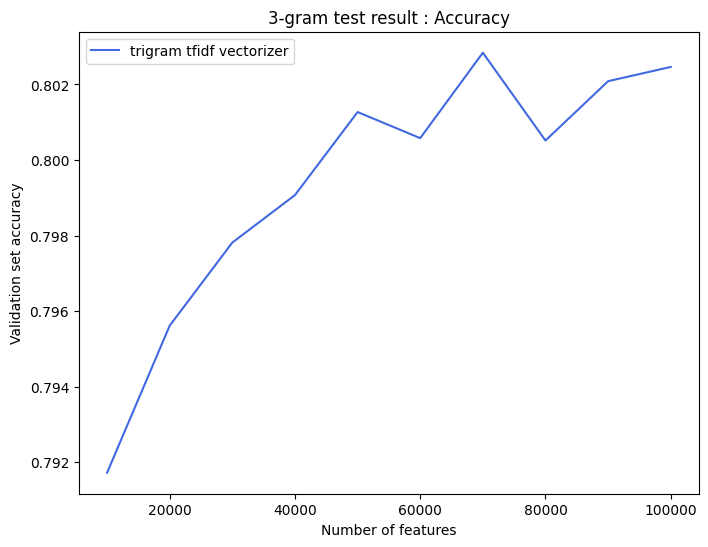

In [5]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

my_df = pd.read_csv('clean_tweets.csv', index_col=0)
x = my_df.clean_text
y = my_df.target
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=42)

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    null_accuracy = len(x_test[y_test == 0])/len(x_test) if len(x_test[y_test == 0])/len(x_test) > 0.5 else 1 - len(x_test[y_test == 0])/len(x_test)
    
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    
    if accuracy > null_accuracy:
        print("model is {0:.2f} % more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    
    return accuracy, train_test_time

# cvec = CountVectorizer()
tvec = TfidfVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []

    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    
    return result

feature_result_tgt = nfeature_accuracy_checker(ngram_range=(1, 3))

nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.title("3-gram test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [40]:
# Hyperparameter tuning: training a model with 70000 features, as this was the best performing classifier last time
model_df = pd.read_csv('clean_tweets_with_stopwords.csv', index_col=0)
x_model = model_df.clean_text
y_model = model_df.target
x_train_model, x_validation_and_test_model, y_train_model, y_validation_and_test_model = train_test_split(x_model, y_model, test_size=.02, random_state=42)
x_validation_model, x_test_model, y_validation_model, y_test_model = train_test_split(x_validation_and_test_model, y_validation_and_test_model, test_size=.5, random_state=42)

ALT_STOPWORDS = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 
                'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
                't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves']

tvec_model = TfidfVectorizer()
tvec_model.set_params(stop_words=ALT_STOPWORDS, max_features=70000, ngram_range=(1,3))

TfidfVectorizer(max_features=70000, ngram_range=(1, 3),
                stop_words=['a', 'about', 'above', 'after', 'again', 'ain',
                            'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at',
                            'be', 'because', 'been', 'before', 'being', 'below',
                            'between', 'both', 'by', 'can', 'd', 'did', 'do',
                            'does', 'doing', 'down', ...])

In [42]:
lr_model = LogisticRegression(max_iter=1000)

checker_pipeline = Pipeline([
    ('vectorizer', tvec_model),
    ('classifier', lr_model)
])

print("Validation result for {} features".format(tvec_model.max_features))
accuracy_summary(checker_pipeline, x_train_model, y_train_model, x_validation_model, y_validation_model)

Validation result for 70000 features
null accuracy: 50.39%
accuracy score: 81.58%
model is 31.19 % more accurate than null accuracy
train and test time: 132.32s
--------------------------------------------------------------------------------


(0.815812554817692, 132.31815576553345)

In [36]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
# tvec_model = TfidfVectorizer()
# tvec_model.set_params(stop_words=None, max_features=100000, ngram_range=(1,3))

checker_pipeline = Pipeline([
    ('vectorizer', tvec_model),
    ('classifier', clf)
])

print("Validation result for {} features".format(tvec_model.max_features))
accuracy_summary(checker_pipeline, x_train_model, y_train_model, x_validation_model, y_validation_model)

Validation result for 70000 features
null accuracy: 50.59%
accuracy score: 75.95%
model is 25.36 % more accurate than null accuracy
train and test time: 85.06s
--------------------------------------------------------------------------------


(0.7595000314050625, 85.05881237983704)

In [44]:
# saving model
import pickle

model_df = pd.read_csv('clean_tweets_with_stopwords.csv', index_col=0)
x_model = model_df.clean_text
y_model = model_df.target

tvec_model = TfidfVectorizer()
tvec_model.set_params(stop_words=None, max_features=70000, ngram_range=(1,3))
lr_model = LogisticRegression(max_iter=1000)

model_pipeline = Pipeline([
    ('vectorizer', tvec_model),
    ('classifier', lr_model)
])

model = model_pipeline.fit(x_model, y_model)

pickle.dump(model, open('final_model.sav', 'wb'))

In [81]:
import tweepy
import os
from dotenv import load_dotenv

load_dotenv()

consumer_key = os.getenv('API_KEY')
consumer_secret = os.getenv('API_KEY_SECRET')
access_token = os.getenv('ACCESS_TOKEN')
access_token_secret = os.getenv('ACCESS_TOKEN_SECRET')
bearer_token = os.getenv('BEARER_TOKEN')

client = tweepy.Client(bearer_token)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
api = tweepy.API(auth)

search_word = 'tesla' 
filter_retweet = ' -is:retweet'
filter_mentions = ' -has:mentions'
filter_replies = ' -is:reply'
filter_english = ' lang:en'
date_since = '2023-01-01'

tweets = client.search_recent_tweets(query=search_word+filter_retweet+filter_english)
for i, tweet in enumerate(tweets.data):
    print(i, tweet.text)

0 In 2019, Morgan Stanley forecast that Tesla would only sell 71k in China in any year. Tesla delivered 76,663 in March 2023 alone. https://t.co/MTLeOQh38r
1 @strengthPlan We’ll have to wait until Tesla Energy is more than a rounding error.   

Wall St. will notice by the end of this year, and Tesla Energy will rival auto sales by the end of ‘24.  

Hang in there👍
2 Deja vu. Tesla promised the same thing a year ago. They were lying then, so are they finally telling the truth now? 🤔

https://t.co/W8IYLpAAc2
3 @TheEconomist Tesla Megapacks offer inertia to the grid, problem is already solved

https://t.co/EW5P2SFCd6
4 @elonmusk If you tweet my name I'll trade my domain for a Tesla.
😂😂😂

Unbelievable 🤣 https://t.co/SywqPpDDef
5 @Teslaconomics @elonmusk Can Tesla sort out the park assist first? Waited 6 months for Tesla vision software update to find that it works intermittently in bad weather or uf any of the cameras have water on them ….I live in the Uk 🤷🏻‍♂️
6 @elonmusk I can’t afford a

In [82]:
model = pickle.load(open('final_model.sav', 'rb'))

In [84]:
def sentiment_analyzer(model, tweets):
    predicted_sentiments = model.predict(tweets)
    print(predicted_sentiments)
    print(sum(predicted_sentiments)/len(predicted_sentiments))
    print((sum(predicted_sentiments)/len(predicted_sentiments))/4)

tweets = client.search_recent_tweets(query=search_word+filter_retweet+filter_english, max_results=100)
clean_tweets = []
for tweet in tweets.data:
    print(tweet.text)
    clean_tweets.append(text_cleaner(tweet.text))

sentiment_analyzer(model, clean_tweets)

@DredgeDiver @RealDanODowd @Tesla @elonmusk He actually shared my video and monetized it and shared it out of context, thankfully people have brains and watched more than 10 seconds like Dan did

https://t.co/wsw7PnXqfl
@aaronsayswhat1 @MadScientistFF I hate pulling up to a light with a Tesla. My car is pretty quick for a sedan (5.5 0-60) but any Tesla would easily smoke me if they think I'm trying to race. I don't typically floor it off the line but I do like to get up to speed quick and then cruise the allotted 5 or so over
Hey @elonmusk, here a big fan of yours from India, please gift me a @tesla Cyber truck and I will be thankful if you will pay the import duty also. @tesla @mayemusk @grimes
@TeslaBoomerMama @SawyerMerritt 5+ years driving Tesla cars and my only service cost has been screen wash from Amazon
In 2019, Morgan Stanley forecast that Tesla would only sell 71k in China in any year. Tesla delivered 76,663 in March 2023 alone. https://t.co/MTLeOQh38r
@strengthPlan We’ll hav